<a href="https://colab.research.google.com/github/NijjohUnno/Sales-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **import the python Libraries and the dataset**

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

January = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_January_2019.csv')
February = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_February_2019.csv')
March = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_March_2019.csv')
April = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv')
May = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_March_2019.csv')
June = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_June_2019.csv')
July = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_July_2019.csv')
August = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_August_2019.csv')
September = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_September_2019.csv')
October = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_October_2019.csv')
November = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_November_2019.csv')
December = pd.read_csv('/content/drive/MyDrive/Sales_Data/Sales_December_2019.csv')

In [ ]:
January.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


**Merging the 12 months sales Data into a single file.**

In [3]:
sales_year = pd.concat([January, February, March,April, May, June, July, August, September, October, November, December])



**Read updated DataFrame.**

In [4]:
sales_year.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


**Check the new data frame**

In [ ]:
sales_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185441 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          184907 non-null  object
 1   Product           184907 non-null  object
 2   Quantity Ordered  184907 non-null  object
 3   Price Each        184907 non-null  object
 4   Order Date        184907 non-null  object
 5   Purchase Address  184907 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


**Summary Statistics**

**Checking Sum of null values for each column**

In [6]:
print(sales_year.isnull().sum())

Order ID            534
Product             534
Quantity Ordered    534
Price Each          534
Order Date          534
Purchase Address    534
dtype: int64


**Checking rows of Nan**

In [7]:
nan_rows = sales_year[sales_year.isna().any(axis=1)]
print(nan_rows)

      Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664        NaN     NaN              NaN        NaN        NaN              NaN
678        NaN     NaN              NaN        NaN        NaN              NaN
797        NaN     NaN              NaN        NaN        NaN              NaN
876        NaN     NaN              NaN        NaN        NaN              NaN
1299       NaN     NaN              NaN        NaN        NaN              NaN
...        ...     ...              ...        ...        ...              ...
22945      NaN     NaN              NaN        NaN        NaN              NaN
22962      NaN     NaN              NaN        NaN        NaN              NaN
23309      NaN     NaN              NaN        NaN        NaN              NaN
23996      NaN     NaN              NaN        NaN        NaN              NaN
24730      NaN     NaN              NaN        NaN        NaN              NaN

[534 rows x 6 columns]


**Dropping rows of Nan**

In [8]:
sales_year = sales_year.dropna()
nan_rows = sales_year[sales_year.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address]
Index: []


**Add Month Column**

In [10]:
# Extracting the month component and adding it as a new column
s = pd.Series('Order Date')
sales_year['Month'] = sales_year['Order Date'].str.slice(stop=2)
sales_year.tail()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001",12


**What was the best month for sales? How much was earned that month**

In [15]:
# Converting 'Quantity Ordered' and 'Price Each' to numeric values and handling errors
sales_year['Quantity Ordered'] = pd.to_numeric(sales_year['Quantity Ordered'], errors='coerce')
sales_year['Price Each'] = pd.to_numeric(sales_year['Price Each'], errors='coerce')

# Droping rows with NaN values resulting from non-numeric conversions
sales_year = sales_year.dropna(subset=['Quantity Ordered', 'Price Each'])

# Calculating total sales for each order
sales_year['Total Sales'] = sales_year['Quantity Ordered'] * sales_year['Price Each']

# Group by month and calculating the total sales for each month
monthly_sales = sales_year.groupby('Month')['Total Sales'].sum()

# Finding the best month for sales and the corresponding earnings
best_month = monthly_sales.idxmax()
earnings_in_best_month = monthly_sales.max()

print(f"The best month for sales was Month {best_month} with earnings of {earnings_in_best_month:,.2f}")


The best month for sales was Month 03 with earnings of 5,610,993.26


**Monthly Sales**

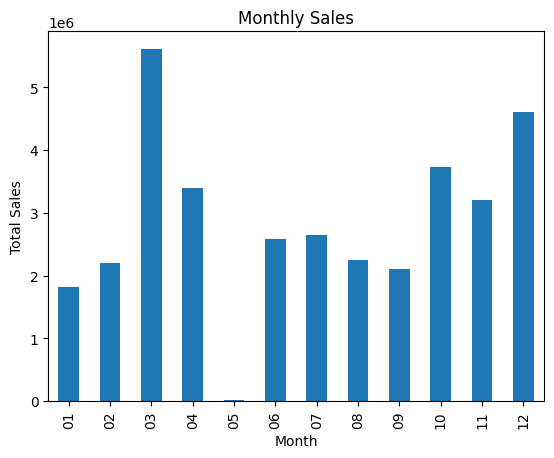

In [17]:
monthly_sales = sales_year.groupby('Month')['Total Sales'].sum()

monthly_sales.plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

**Product Performance Analysis**

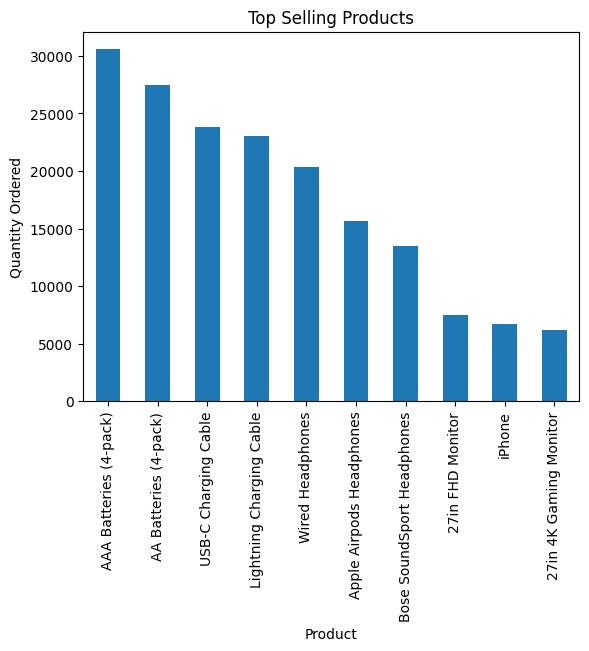

In [18]:
# Top-selling products
top_products = sales_year.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)

# Bar chart for top-selling products
top_products.plot(kind='bar')
plt.title('Top Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()
